In [16]:
import numpy as np
import sys
sys.path.append('../src/src_python/')
from dynamics import dynamics

import matplotlib.pyplot as plt

We plot the condition

$$ \epsilon < \max\left\{ \frac{\left \|L_\mathbf{g}h(\mathbf{x}) \right\|}{2\mathfrak{L}_{L_\mathbf{g}h}}, \frac{L_\mathbf{f}h(\mathbf{x}) +  \alpha(h(\mathbf{x}))}{(\mathfrak{L}_{L_\mathbf{f}h} + \mathfrak{L}_{\alpha \circ h})} \right\} $$


In [17]:
# code from ECOS filter and ecos.launch

L_Lgh = 0.5
L_Lfh = 0.1
L_ah = 5
alpha = 10
C = 1 # TODO: not sure which param this should be

def get_fns(x):
    
    f,g = dynamics(x)
    x5_eq = 0.138
    # todo: should only certain components count?
    Lfh = -x[6]*(x[5] - x5_eq + f[6])
    Lgh = -x[6]*g[6,[0,1]]  
    ah = alpha * (-1/2*((x[5]-x5_eq)**2 + x[6]**2) + C)
    
    return Lgh, Lfh, ah

def get_bd(x):
    Lgh, Lfh, ah = get_fns(x)
    return max(np.linalg.norm(Lgh) / (2*L_Lgh), (Lfh + ah)/(2*(L_Lfh+L_ah)))

In [18]:
train_data_fn = 'gridded_data.csv'
data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
states = data['states']


In [19]:
eps_bounds = []
for state in states:
    # TODO need to max over all other state dimensions
    eps_bounds.append(get_bd(state))

Text(0, 0.5, 'theta')

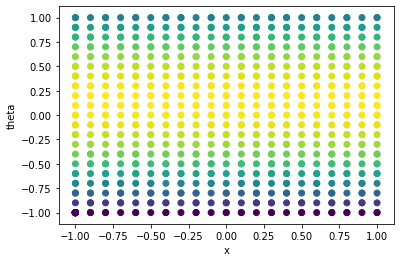

In [22]:
plt.figure()
plt.scatter(states[:,0], states[:,5], c=np.array(eps_bounds).flatten())
plt.xlabel('x')
plt.ylabel('theta')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [-1.,  0.,  0., ...,  0., -1.,  0.],
       [-1.,  0.,  0., ...,  0., -1.,  0.],
       [-1.,  0.,  0., ...,  0., -1.,  0.]])